#### Computational Modeling of Cognition and Behavior

# 2 From Words to Models
## Building a Toolkit

***

## 2.1 Response Times in Speeded-Choice Tasks

***

<br>

"Choice rection time" task (Smith and Vickers 1998)

<br>

Can be approached using a "random walk model":

<br>

Simple model assumptions:

- Evidence for a decision is built up gradually.

- Evidence is sampled at discrete time steps.

- Sampling starts with 0 evidence


How the model works:

- Magnitude of discrete nudges towards a decision reflects the information available at a single sample.

- Sampled evidence is summed accross time steps until a response threshold is reached.

- Sampling starts with 0 evidence and moves towards one of two thresholds, each representing a choice (left/righ for example).

Some conclusions:

- If the two thresholds are equidistant from 0, the reponse times should be equal.


Prediction of the model:

- Response time is dependent on evidence 

<br>

## 2.1 Response Times in Speeded-Choice Tasks

***
<br>

### 2.2.1 Getting started

<br>

### 2.2.2 The Random-Walk Model

<br>

First, a function is created to simulate a single trial, it takes the evidence for a single trial and a threshold as it's inputs.

<br>


In [38]:
import numpy as np


def random_walk_trial(acc_drift_row, threshold):
    """ Single trial for a random walk model of decision making. See python 
    file with the same name for full docstring."""
    try:
        # look for the first index when the threshold is crossed
        trial_latency = np.where(np.abs(acc_drift_row) >= threshold)[0][0]
    # if the index is never crossed
    except IndexError:  
        trial_latency = -1  # no latency
    if trial_latency == -1:
        trial_response = 0  # no response
    # if the index is crossed
    else:
        trial_response = np.sign(acc_drift_row[trial_latency])
        # fix values once the threshold is crossed
        acc_drift_row[trial_latency:] = trial_response * threshold  
    return acc_drift_row, trial_latency, trial_response


<br>

Then, a function is created to generate evidence, with a row for every trial. It then runs the random walk model on every trial. Two dataframes are output. 'df_trial_data' gives a trial per row, containing the trial response and trail latency (time taken to make a decision). The second dataframe 'df_dv' contains the decision variable (dv) for every time point (rows) for every trial (columns). 

<br>

**Note**: Model is not an evidence accumulator model! Evidence fixes the centre of a distribution of drift.

<br>

In [39]:
import pandas as pd

def random_walk(nreps, nsamples, drift, sd_rw, threshold):
    """Random walk model of decision making. See python file with the same name for full 
    docstring."""
    # construct drift accumulator for every trial (rep)
    start_zero_drift = np.zeros((nreps, 1))
    rand_norm_incr = np.random.normal(loc=drift,
                                      scale=sd_rw,
                                      size=[nreps, nsamples])
    drift_incr = np.concatenate((start_zero_drift, rand_norm_incr),
                                   axis=1)
    acc_drift = drift_incr.cumsum(axis=1)
    # run the random walk function on every row of drift
    dv, trial_latency, trial_response = zip(*[random_walk_trial(acc_drift_row, threshold)
                                              for acc_drift_row
                                              in acc_drift])
    # generate column names, giving each trial a number
    column_names = ["trial_" + str(trial_n) for trial_n in np.arange(nreps)]
    # package into dataframes
    dv_array = np.asarray(dv).T
    df_dv = pd.DataFrame(data=dv_array,
                         columns=column_names)
    df_trial_data = pd.DataFrame(data={'trial_latency': trial_latency,
                                       'trial_response': trial_response})
    return df_dv, df_trial_data

<br>

Then I set some specific values to variables and run a simulation.

<br>


In [42]:
from IPython.display import display

# set example params
df_dv, df_trials = random_walk(nreps=2000,
                               nsamples=200,
                               drift=0,  # the amount of evidence, 0 gives a random decision 
                               sd_rw=0.3,  # standard deviation of random walk (noise in the evidence)
                               threshold=3)

df_dv_above, df_trials_above = random_walk(nreps=2000,
                                             nsamples=200,
                                             drift=0.3,  # the amount of evidence, 0.3 gives a decision to the above boundry 
                                             sd_rw=0.3,  # standard deviation of random walk (noise in the evidence)
                                             threshold=3)


display(df_dv.head())
display(df_trials.head())

,trial_0,trial_1,trial_2,trial_3,trial_4,trial_5,trial_6,trial_7,trial_8,trial_9,...,trial_1990,trial_1991,trial_1992,trial_1993,trial_1994,trial_1995,trial_1996,trial_1997,trial_1998,trial_1999
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.192392,-0.019332,0.013225,0.117328,0.254381,-0.406788,-0.469411,0.245190,-0.182905,0.094447,...,-0.142814,-0.069961,0.168473,-0.508412,0.079665,0.151476,-0.451703,0.042488,0.174193,-0.045901
2,0.558353,0.563455,-0.364592,0.265868,0.189393,-0.551337,-0.847402,0.578770,0.331233,-0.120925,...,0.051794,0.212252,1.002051,-0.687907,0.207530,-0.038577,-0.089635,0.344887,0.387089,-0.193760
3,0.409414,0.774122,-0.663778,0.594567,0.290074,-0.340066,-0.684719,0.432639,0.244098,0.118642,...,-0.217337,0.514261,1.262580,-0.546722,0.410301,-0.192877,-0.507693,0.216878,0.255735,0.171391
4,0.560208,1.004844,-0.082349,0.775863,0.292482,-0.617993,-0.383935,0.381908,0.912448,0.270339,...,-0.597615,0.164787,1.127557,-0.994469,0.214738,-0.224357,-0.754270,0.136950,0.286660,-0.125907


,trial_latency,trial_response
0,97,1.0
1,160,-1.0
2,57,-1.0
3,68,-1.0
4,36,1.0


<br>

From this point, it is simple to plot and visualise the decision variable for several trials.

<br>

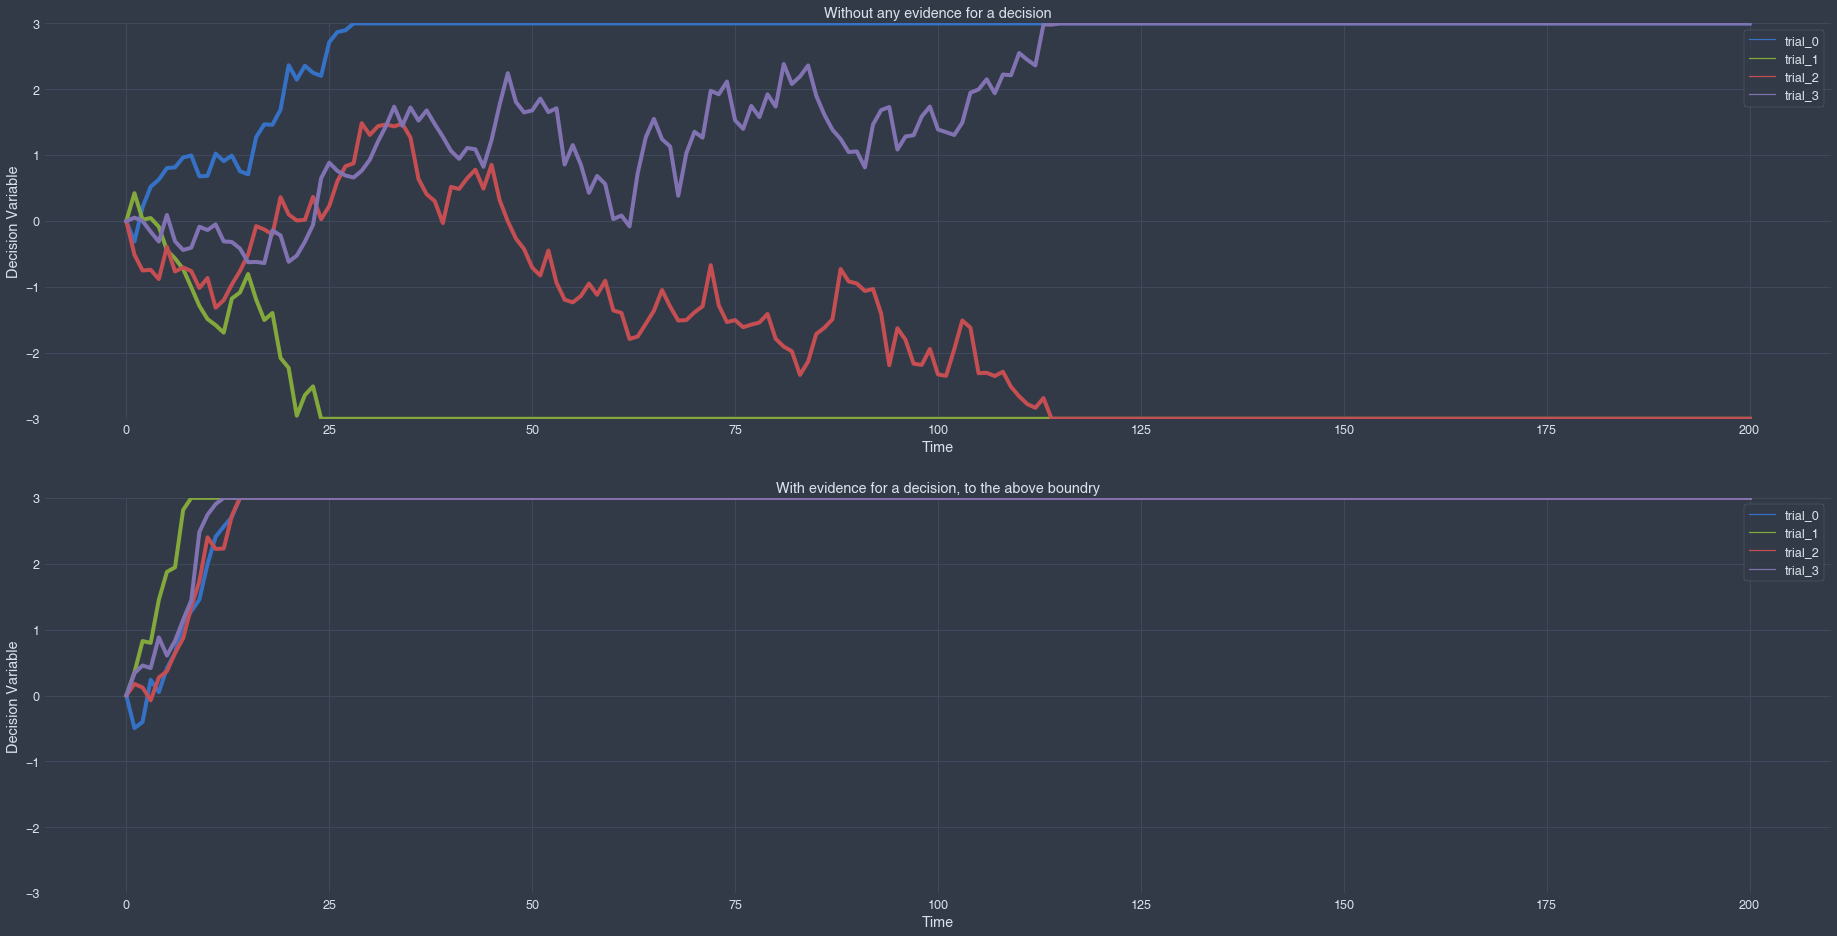

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style('chesterish',
             spines=False,
             figsize=(40, 20))

plt.subplot(2, 1, 1)
plt.xlabel('Time')
plt.ylabel('Decision Variable')
plt.title('Without any evidence for a decision')
plt.ylim(-3,3)
sns.lineplot(data=df_dv.iloc[:, 0:4],
             dashes=False,
             linewidth=4);

plt.subplot(2, 1, 2)
plt.xlabel('Time')
plt.ylabel('Decision Variable')
plt.title('With evidence for a decision, to the above boundry')
plt.ylim(-3,3)
sns.lineplot(data=df_dv_above.iloc[:, 0:4],
             dashes=False,
             linewidth=4);